___
#### catplot
```python
: categorical plot, 카테고리별로 그래프를 그림.

1) 카테고리별로 기본 그래프 그리기
- sns.catplot(data=df, x='컬럼1', y='컬럼2', kind='box')
    > x축에는 카테고리가 될 데이터가 있는 컬럼을 사용하고,
    > y축에는 해당 카테고리별로 비교하고 싶은 수치 데이터 컬럼을 사용한다.
        ex) os 종류별로 가격대를 비교하기 -> x축에는 'os', y축에는 'price'.
    > kind 파라미터에는 어떤 그래프를 그릴 것인지 결정.

2) strip 그래프 그리기
- sns.catplot(data=df, x='컬럼1', y='컬럼2', kind='strip')
    > strip 그래프를 그리면, 각 카테고리에 데이터가 얼마나 있는지 산점도그래프처럼 그려줌.
    > box 플롯이나 violin 플롯으로 그리면 데이터의 개수를 알 수 없기 때문에 신뢰성을 의심하게 되지만,
      이렇게 데이터의 개수가 나와 있으면 더 판단하기가 쉬움.

3) 점 색상 변경하기
- sns.catplot(data=df, x='컬럼1', y='컬럼2', kind='strip', hue='컬럼3')
    > hue 파라미터는 색.
    > hue='컬럼3'은 해당 컬럼의 데이터에 따라 strip 그래프에서 색을 다르게 해 주는 옵션
        ex) hue='processor_brand': 프로세서 브랜드가 intel인 데이터와 amd인 브랜드의 점 색상을 다르게 함.

4) swarm 그래프 그리기기
- sns.catplot(data=laptops_df, x='os', y='price', kind='swarm', hue='processor_brand')
    > strip 플롯에서 점들이 겹쳐져 불편하다면 swarm 플롯을 그리기.
    > 점들이 옆으로 펼쳐진다.
```
___

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
laptops_df = pd.read_csv('../data/laptops.csv')
laptops_df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [6]:
laptops_df['os'].unique()

array(['linux', 'mac', 'windows'], dtype=object)

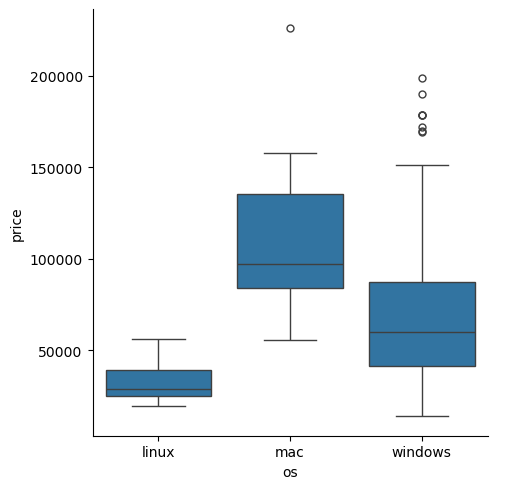

In [8]:
# 어떤 os가 비쌀까?
sns.catplot(data=laptops_df, x='os', y='price', kind='box')

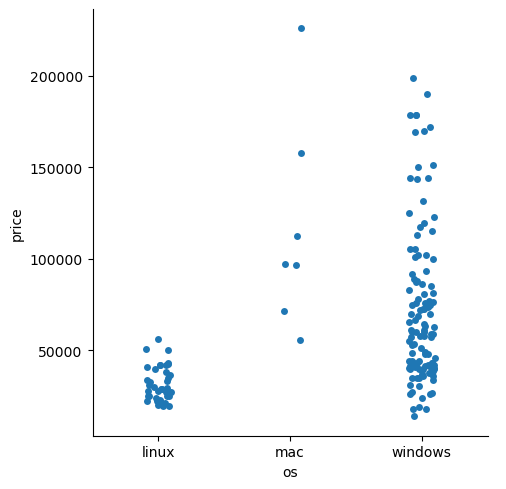

In [9]:
# 각 os별로 데이터가 몇 개씩 있는지? -> 시각화의 신뢰성을 판단 가능.
sns.catplot(data=laptops_df, x='os', y='price', kind='strip')

In [10]:
laptops_df['processor_brand'].unique()

array(['intel', 'amd'], dtype=object)

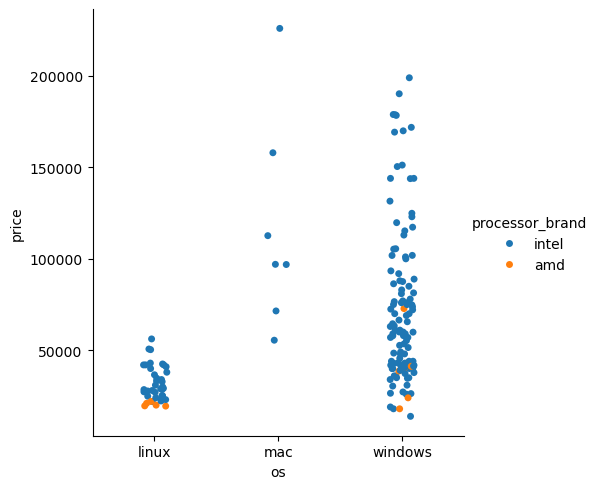

In [11]:
# 각 os에서 어떤 프로세서 브랜드를 사용할까?
sns.catplot(data=laptops_df, x='os', y='price', kind='strip', hue='processor_brand')
    # intel 프로세서를 사용하는 노트북이 훨씬 많다.
    # amd 프로세서를 사용하는 노트북은 대체로 그래프 아래쪽에 위치하므로 비교적 가격대가 낮다.

c:\Users\emma1\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


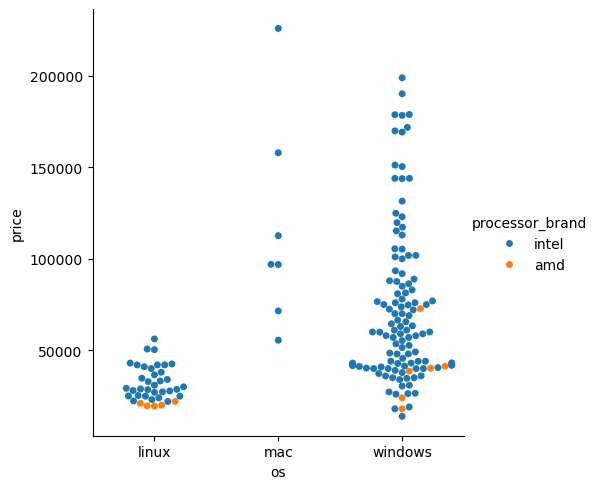

In [12]:
# strip 그래프에서 점들이 겹쳐져서 불편할 땐?
sns.catplot(data=laptops_df, x='os', y='price', kind='swarm', hue='processor_brand')